In [1]:
# Classification End To End Machine Learning Project Algorithm For Sonar all dataset

In [2]:
# Load csv file

import pandas as pd
dataset=pd.read_csv('sonar.all-data.csv')

In [5]:
# Descriptive head of a dataset
print(dataset.head(3))
# Descriptive shape of a dataset
print("Descriptive shape for each attribute",dataset.shape)
# Descriptive data type for each attribute
print("Descriptive data type for each attribute",dataset.dtypes)

   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  

[3 rows x 61 columns]
('Descriptive shape for each attribute', (207, 61))
('Descriptive data type for each attribute', 0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
0.0986    float64
0.1539    float64
0.1601    float64
0.3109    float64
0.2111    float64
0.

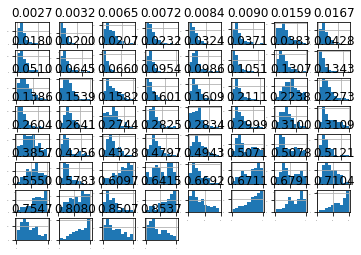

In [10]:
# Visualistion for each attribute to know what kind of distribution it is ?

import matplotlib.pyplot as plt
# Histogram plot visualisation
dataset.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.show()

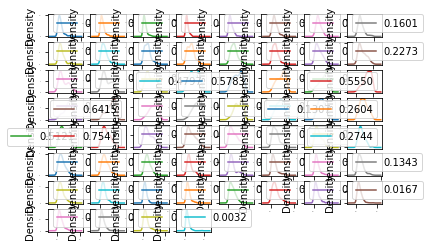

In [15]:
# As per above plots it is not clearly visible to know what kind of distribution it is
# To View smooth curve we need to use density plot visualistion

# Density plot visualistion
dataset.plot(kind='density',sharex=False,sharey=False,subplots=True,layout=(8,8),fontsize=1)
plt.show()

In [16]:
# As per above plots each attribute have different type of distributions
# we need to keep all attributes in same distribution though feature scaling

In [17]:
# Split the dataset into input and output attribute
array=dataset.values
x=array[:,:-1]
y=array[:,-1]
print("--------------- x Input Attribute --------------")
print(x[:2,:])
print("--------------- y Output Attribute -------------")
print(y[:2,])

--------------- x Input Attribute --------------
[[0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872
  0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.0 0.8874 0.8024 0.7818
  0.5212 0.4052 0.3957 0.3914 0.325 0.32 0.3271 0.2767 0.4423 0.2028
  0.3788 0.2947 0.1984 0.2341 0.1306 0.4182 0.3835 0.1057 0.184 0.197
  0.1674 0.0583 0.1401 0.1628 0.0621 0.0203 0.053 0.0742 0.0409 0.0061
  0.0125 0.0084 0.0089 0.0048 0.0094 0.0191 0.014 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 0.1083 0.0974 0.228 0.2431 0.3771 0.5598 0.6194
  0.6333 0.706 0.5544 0.532 0.6479 0.6931 0.6759 0.7551 0.8929 0.8619
  0.7974 0.6737 0.4293 0.3648 0.5331 0.2413 0.507 0.8533 0.6036 0.8514
  0.8512 0.5045 0.1862 0.2709 0.4232 0.3043 0.6116 0.6756 0.5375 0.4719
  0.4647 0.2587 0.2129 0.2222 0.2111 0.0176 0.1348 0.0744 0.013 0.0106
  0.0033 0.0232 0.0166 0.0095 0.018 0.0244 0.0316 0.0164 0.0095 0.0078]]
--------------- y Output Attribute -------------
['R' 'R']


In [18]:
# Splitting the dataset into train and test set
train_size=0.80
test_size=0.20
seed=5
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=train_size,test_size=test_size,random_state=seed)

Logistic : 0.776103 (0.088746)
knn : 0.782353 (0.095896)
naive : 0.702574 (0.070171)
svc : 0.625000 (0.158216)
tree : 0.702574 (0.106026)
forest : 0.818750 (0.079109)


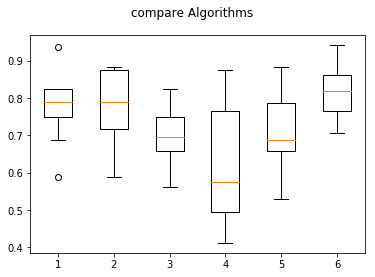

In [24]:
# Spot check and compare classification algorithms without applying feature scaling
# Evaluate classification algorithms without applying feature scaling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
estimators=[]
estimators.append(('Logistic',LogisticRegression()))
estimators.append(('knn',KNeighborsClassifier(n_neighbors=3)))
estimators.append(('naive',GaussianNB()))
estimators.append(('svc',SVC()))
estimators.append(('tree',DecisionTreeClassifier()))
estimators.append(('forest',RandomForestClassifier(n_estimators=20)))

# Evaluate model from end to end
scoring='accuracy'
results=[]
names=[]
for name,model in estimators:
    kfold=KFold(n_splits=10,random_state=seed)
    result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
# Visualistion Compare Algorithm result with white box plot
fig=plt.figure()
fig.suptitle('compare Algorithms')
plt.boxplot(results)
plt.show()

In [22]:
# As per above plot ans accuracy
#Random forest providing best accuracy of 81.87% and knn provides 78.23% and logistic regression 77.6%

scale logistic_regression : 0.818750 (0.114113)
scale KNN : 0.855147 (0.053257)
scale naive bayes : 0.702574 (0.070171)
scale SVC : 0.861397 (0.081549)
scale decision tree : 0.708088 (0.090223)
scale random forest : 0.812500 (0.049462)


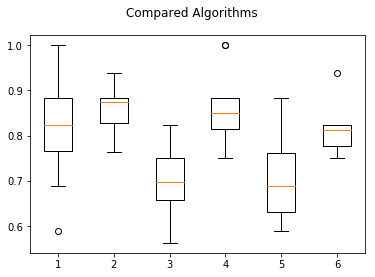

In [26]:
# Spot check and compare classification algorithm with feature scale and pipeline techinque
# Evalute Classification algorithm with feature scale
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
estimators=[]
estimators.append(('scale logistic_regression',Pipeline([('scaler',StandardScaler()),
                                                         ('lg',LogisticRegression())])))
estimators.append(('scale KNN',Pipeline([('scale',StandardScaler()),
                                         ('KNN',KNeighborsClassifier(n_neighbors=3))])))
estimators.append(('scale naive bayes',Pipeline([('scale',StandardScaler()),
                                                 ('naive bayes',GaussianNB())])))
estimators.append(('scale SVC',Pipeline([('scale',StandardScaler()),
                                         ('SVC',SVC())])))
estimators.append(('scale decision tree',Pipeline([('scale',StandardScaler()),
                                                   ('Decision tree',DecisionTreeClassifier())])))
estimators.append(('scale random forest',Pipeline([('scale',StandardScaler()),
                                                   ('Random forest',RandomForestClassifier(n_estimators=20))])))

# Evalute model one by one
results=[]
names=[]
for name,model in estimators:
    kfold=KFold(n_splits=10,random_state=seed)
    result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(result)
    names.append(name)
    msg="%s : %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    
    
# Visualistion for compared algorithms
fig=plt.figure()
fig.suptitle('Compared Algorithms')
plt.boxplot(results)
plt.show()

In [27]:
# As per above compared algorithm with feautre scale we got more accurate accuray
# SVC model as 86.13%, KNN model as 85.5% and logistic regression as 81.8% and random forest as 81.2%

In [29]:
# Applying Algorithm Tuning for first two accurate models SVC and KNN

from sklearn.model_selection import GridSearchCV
# Algorithm Tuning for SVC
scaler=StandardScaler()
scaler.fit(x_train)
rescaledx=scaler.transform(x_train)
# C value is used how much to relax the margin
c_values=[0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0]
# kernel values
kernel_values=['linear','poly','rbf','sigmoid']
param_grid=dict(C=c_values,kernel=kernel_values)
model=SVC(gamma='auto')
kfold=KFold(n_splits=10,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledx,y_train)

print("Best : %f using %s "%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,std,param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,std,param))

Best : 0.884848 using {'kernel': 'rbf', 'C': 1.5} 
0.793939 (0.072723) with: {'kernel': 'linear', 'C': 0.1}
0.563636 (0.153702) with: {'kernel': 'poly', 'C': 0.1}
0.606061 (0.167499) with: {'kernel': 'rbf', 'C': 0.1}
0.684848 (0.100633) with: {'kernel': 'sigmoid', 'C': 0.1}
0.800000 (0.069982) with: {'kernel': 'linear', 'C': 0.3}
0.654545 (0.088822) with: {'kernel': 'poly', 'C': 0.3}
0.775758 (0.044837) with: {'kernel': 'rbf', 'C': 0.3}
0.763636 (0.063795) with: {'kernel': 'sigmoid', 'C': 0.3}
0.812121 (0.081048) with: {'kernel': 'linear', 'C': 0.5}
0.690909 (0.093015) with: {'kernel': 'poly', 'C': 0.5}
0.812121 (0.059672) with: {'kernel': 'rbf', 'C': 0.5}
0.769697 (0.063609) with: {'kernel': 'sigmoid', 'C': 0.5}
0.812121 (0.082004) with: {'kernel': 'linear', 'C': 0.7}
0.769697 (0.118158) with: {'kernel': 'poly', 'C': 0.7}
0.848485 (0.075922) with: {'kernel': 'rbf', 'C': 0.7}
0.787879 (0.065849) with: {'kernel': 'sigmoid', 'C': 0.7}
0.793939 (0.083957) with: {'kernel': 'linear', 'C': 0

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# As per above c=1.5 and kernel='rbf' if best values to reach accuracy from 86.13% to 88.48% accuracy

In [35]:
# Tuning for KNN
scaler=StandardScaler()
scaler.fit(x_train)
rescaledx1=scaler.transform(x_train)
neighbors=[1,3,6,9,11,13,15,17,19,21,23,25,27,30]
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=KFold(n_splits=10,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledx1,y_train)
print("Best : %f using %s"%(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,std,param in zip(means,stds,params):
    print("%f (%f) with: %r"%(mean,std,param))

Best : 0.860606 using {'n_neighbors': 1}
0.860606 (0.083238) with: {'n_neighbors': 1}
0.854545 (0.052452) with: {'n_neighbors': 3}
0.787879 (0.069792) with: {'n_neighbors': 6}
0.781818 (0.079347) with: {'n_neighbors': 9}
0.787879 (0.101087) with: {'n_neighbors': 11}
0.806061 (0.103735) with: {'n_neighbors': 13}
0.769697 (0.103049) with: {'n_neighbors': 15}
0.751515 (0.082693) with: {'n_neighbors': 17}
0.757576 (0.106121) with: {'n_neighbors': 19}
0.739394 (0.083904) with: {'n_neighbors': 21}
0.733333 (0.078354) with: {'n_neighbors': 23}
0.739394 (0.071112) with: {'n_neighbors': 25}
0.757576 (0.086580) with: {'n_neighbors': 27}
0.715152 (0.075007) with: {'n_neighbors': 30}


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [36]:
# After Applying tuning to knn model accuracy increase from 85.5% to 86.06%

Random Forest classifier: 0.807353 (0.096071)
Extra Tree Classifier: 0.819485 (0.073390)
Ada Boost classifier: 0.794485 (0.085298)
Gradient boost classifier: 0.835662 (0.091692)


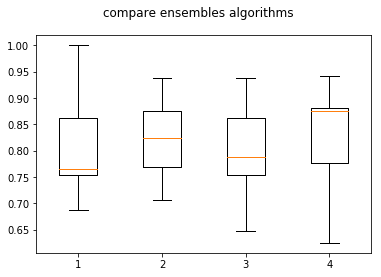

In [40]:
# Ensemble methods
# Another way to improve the performance of algorithms on this problems using ensemble methods

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Ensemble methods
ensembles=[]
ensembles.append(('Random Forest classifier',RandomForestClassifier(n_estimators=10)))
ensembles.append(('Extra Tree Classifier',ExtraTreesClassifier(n_estimators=10)))
ensembles.append(('Ada Boost classifier',AdaBoostClassifier()))
ensembles.append(('Gradient boost classifier',GradientBoostingClassifier()))

# Evaluate each ensemble methods
results=[]
names=[]
for name,model in ensembles:
    kfold=KFold(n_splits=10,random_state=seed)
    result=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(result)
    names.append(name)
    msg="%s: %f (%f)"%(name,result.mean(),result.std())
    print(msg)
    

# Visualise the result thorugh boxplot
fig=plt.figure()
fig.suptitle('compare ensembles algorithms')
plt.boxplot(results)
plt.show()

In [ ]:
# We can see that Extra tree classifier and gradient boosting technique provide 
# strong accuracy scores in 80's % with default configuration

In [45]:
# Finalize model
# SVM showed the most promising as a low complexity and stable model for this problem.

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Prepare the model
scaler=StandardScaler()
scaler.fit(x_train)
scalex=scaler.transform(x_train)
model=SVC(C=1.5,kernel='rbf')
model.fit(scalex,y_train)

# estimation accuracy on validation dataset
scale_test=scaler.transform(x_test)
y_pred=model.predict(scale_test)
print("accuracy score :",accuracy_score(y_test,y_pred))
print("confusion matrix :",confusion_matrix(y_test,y_pred))

('accuracy score :', 0.8095238095238095)
('confusion matrix :', array([[22,  5],
       [ 3, 12]], dtype=int64))


In [ ]:
# We got 80.95% accuracy through SVM Algorithm